In [2]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.59)


Code Blocks from Class on Jan 21, 2020

In [3]:
d <- read.csv("https://soci620.netlify.com/data/USincome_subset_2017.csv")
# again, subsample for less precise estimates:
d <- d[sample(nrow(d),200),]
head(d)

,female,age,race,hispanic,education,income,log_income
28557,1,56,Chinese,0,4+ years college,140000,11.849398
9605,0,34,White,0,4+ years college,75000,11.225243
27342,0,38,White,1,4+ years college,100000,11.512925
6557,0,22,White,1,HS,10000,9.210340
29596,1,42,Black/African American/Negro,0,HS,23000,10.043249
5904,1,23,White,0,Some college,19000,9.852194


In [4]:
m1 <- alist(
    log_income ~ dnorm(mu,sigma),
    mu <- a + b*female,
    a ~ dnorm(0,30),
    b ~ dnorm(0,30),
    sigma ~ dunif(0,50)
)

In [5]:
library(rethinking)
fit1 <- map(m1,data=d)

        Mean StdDev   2.5%  97.5%
a     10.329  0.123 10.087 10.571
b     -0.509  0.177 -0.856 -0.162
sigma  1.252  0.063  1.129  1.375

[1] 0.485

,female,age,race,hispanic,education,income,log_income
13574,1,57,White,1,Some college,385600,12.86256
8711,1,56,White,0,Some college,260000,12.46844
29718,1,75,White,0,HS,268900,12.50209


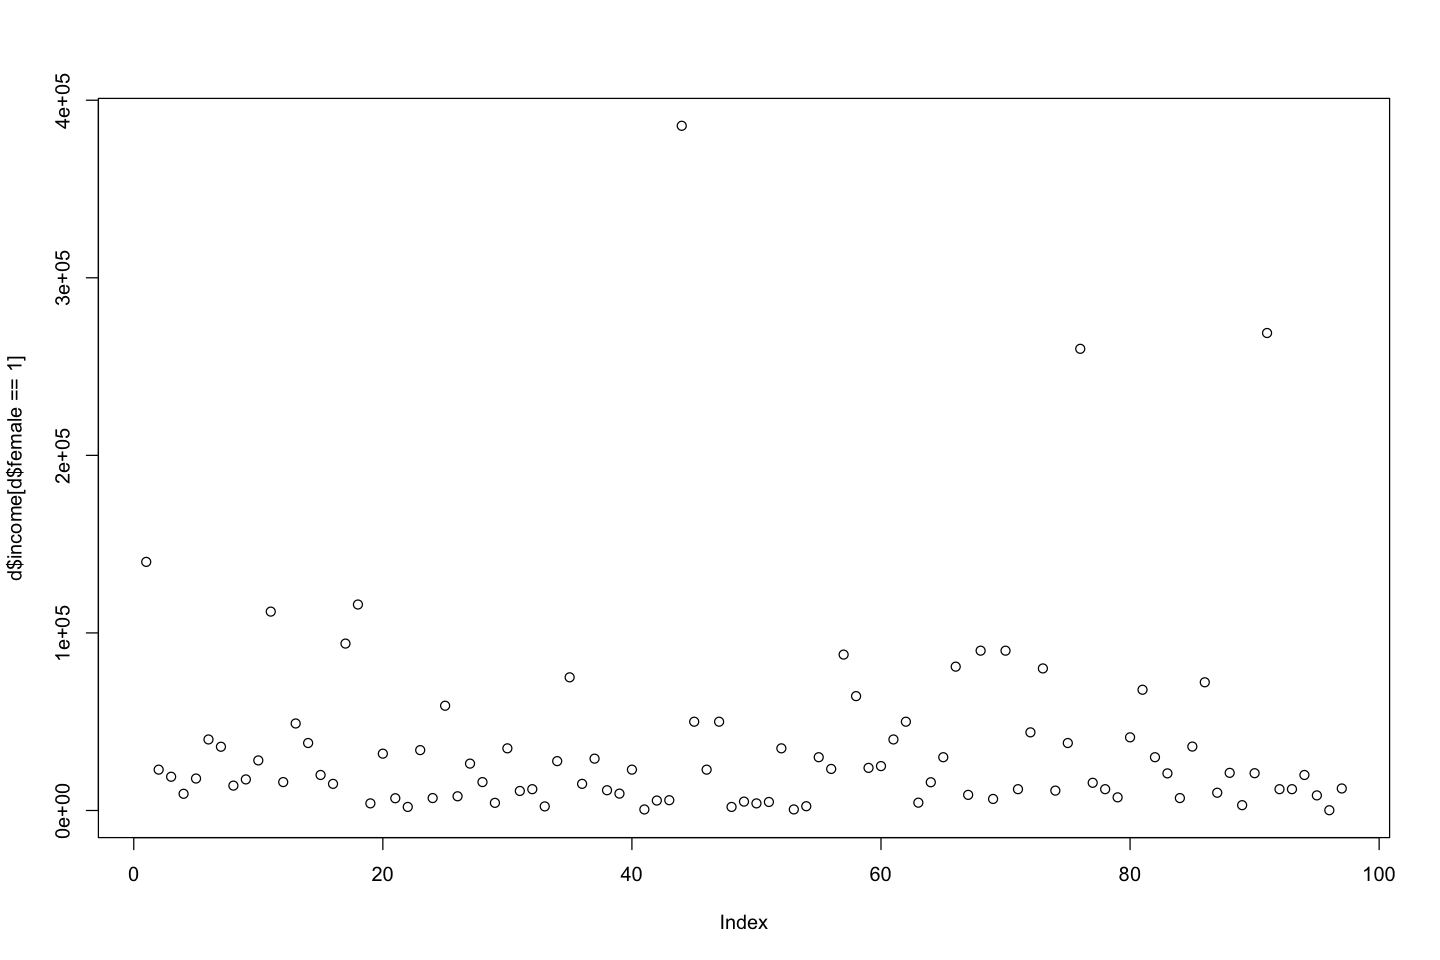

In [6]:
# this command tells jupyter what dimensions to use for its plots.
options(repr.plot.width=12, repr.plot.height=8)

# `prob` specifies the size of the credible interval to calculate
# `digits` speifies how many digits to show for each result
precis(fit1, prob=.95, digits=3)
mean(d$female)
plot(d$income[d$female==1])
d[d$female==1 & d$income>2e5,]